In [1]:
import numpy as np
import pandas as pd

# Simulations == Monte Carlo Method
- Simulation is running an experiment
- Trial is the number of items in each experiment

## How to run a simulation with Python/Numpy/Pandas
1. Figure out a way to represent our data
2. Create a matrix of random data, rows = simulations, columns = trial
    - For example, rolling 2 dice 10,000 times means rows=10,000 and columns = 2 because we roll 2 dice each time.
3. Apply an aggregate function, row-wise to get the results of the simulation
4. Apply a final aggregate to get our probability

In [2]:
# Let's answer questions experimentally rather than theoretically
# What's the probability of flipping "Heads" on a coin?

# Let's flip a coin one million times and figure out the probability of flipping "Heads"

# Let's find a way to represent out data
outcomes = ["Heads", "Tails"]
n_simulations = 1_000_000

flips = np.random.choice(outcomes,  size=n_simulations)

# After flipping one million coins, our experiemental probability of flipping heads is:
(flips == "Heads").mean()

0.499704

In [3]:
flips[0:5]

array(['Tails', 'Tails', 'Heads', 'Tails', 'Tails'], dtype='<U5')

In [ ]:
# Another example: What is the probability of rolling a 5 on a 6 sided die?

# Step 1, represent our data's outcomes
outcomes = [1, 2, 3, 4, 5, 6]

# Step 2, create the data
n_simulations = 10_000

rolls = np.random.choice(outcomes, size=n_simulations)

# What are the chances we roll a 5?
(rolls == 5).mean()

In [ ]:
# What is the probability we'll roll a 5 or a 6 on a 6 sided die?
(rolls >= 5).mean()

In [ ]:
# What is the probability of rolling less than a 3 (but not including 3)
(rolls < 3).mean()

In [ ]:
# What are the chances we roll something other than 3
(rolls != 3).mean()

## Let's Roll 2 Dice at Once!

1. Figure out a way to represent the data
2. Create a matrix of random data, rows=simulations, columns=trials
3. Apply an aggregagte row-wise to get the result of each simulation
4. Apply a final aggregate (probably the .mean) to get our probability

In [4]:
# What are the odds of rolling Snake Eyes on two dice?

# Step 1 Represent our outcomes
outcomes = [1, 2, 3, 4, 5, 6]

# Step 2: Create a matrix of random data where rows=simulations, columns=trial

# Simulation = the number of times we run the experiment
# Trials = the number of things in each experiment
n_simulations = 1_000_000
n_trials = 2 # b/c we're rolling 2 dice with each experiment

# size argument can set our simulation and trial size
rolls = np.random.choice(outcomes, size=(n_simulations, n_trials))
rolls

array([[4, 2],
       [2, 6],
       [6, 1],
       ...,
       [6, 1],
       [6, 3],
       [2, 3]])

In [6]:
rolls[0:5]

array([[4, 2],
       [2, 6],
       [6, 1],
       [3, 5],
       [5, 5]])

In [7]:
rolls.shape

(1000000, 2)

In [8]:
# Step 3: Apply an aggregate row-wise
# axis=1 means sum across the rows
sum_of_rolls = rolls.sum(axis=1)
sum_of_rolls

array([6, 8, 7, ..., 7, 9, 5])

In [9]:
# Axis=0 means sum up the entire column. 
# If you don't put an axis, the default is 0
# rolls.sum(axis=0)

In [10]:
# Step 4.
# Add up all the times that an experiment produces the sum of 2
(sum_of_rolls == 2).mean()

0.028081

In [11]:
theoretical = 1/6 * 1/6
print(f"Our theoretical probability of rolling snake eyes is 1/6 * 1/6, which is {theoretical}")

Our theoretical probability of rolling snake eyes is 1/6 * 1/6, which is 0.027777777777777776


In [17]:
# What is the probability of rolling a 7 on two dice
# 1+6, 2+5, 3+4, 4+3, 5+2, 6+1

# step 1: represent our outcomes
outcomes = [1, 2, 3, 4, 5, 6]

In [18]:
# Step 2: generate a matrix of random outcomes, simulations = rows, trials = columns
# size=(simulations, trials)
# size=(experiements, number_of_dice per experiment)
rolls = np.random.choice(outcomes, size=(10_000, 2))

In [19]:
# Step 3, apply a row-wise aggregate
# axis=1 to apply sum to rows
sum_of_rolls = rolls.sum(axis=1)

p = (sum_of_rolls == 7).mean()
print(f"The experimental probability of rolling a sum of 7 on two dice at once is {p}")

The experimental probability of rolling a sum of 7 on two dice at once is 0.1641


In [20]:
#What's the probability of rolling 2 pips on 2 dice
outcomes = [1,2,3,4,5,6]
n_simulations = 10_000

die1 = np.random.choice(outcomes, size=n_simulations)
die2 = np.random.choice(outcomes, size=n_simulations)

#Each array here shares an index where index = simulation_number
die1[0:3], die2[0:3]

(array([2, 3, 3]), array([2, 1, 3]))

In [21]:
(die1==2)[0:10]

array([ True, False, False, False, False,  True,  True, False, False,
       False])

In [22]:
(die2==2)[0:10]

array([ True, False, False, False, False, False, False,  True, False,
       False])

In [23]:
((die1 == 2) & (die2 == 2))[0:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [24]:
# What are the experimental probabilities of rolling each sum
df = pd.DataFrame()

# possible sum outcomes from 2 dice
df["outcome"] = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [26]:
# write a lil' function that gets the probability
def get_prob(n):
    return (sum_of_rolls == n).mean()

get_prob(2)

0.0269

In [27]:
# set the probability to its own column
df["probability"] = df.outcome.apply(get_prob)

print("Sum outcome of rolling 2 dice and the probability of seeing that outcome")
df

Sum outcome of rolling 2 dice and the probability of seeing that outcome


,outcome,probability
0,2,0.0269
1,3,0.0540
2,4,0.0871
3,5,0.1122
4,6,0.1372
5,7,0.1641
6,8,0.1363
7,9,0.1112
8,10,0.0878
9,11,0.0544


<AxesSubplot:>

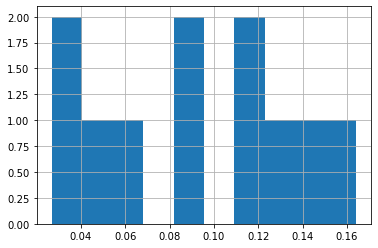

In [28]:
df.probability.hist()

## Setting our own probabilities

In [29]:
# Let's answer questions experimentally rather than theoretically
# What's the probability of flipping "Heads" on a coin?

# Let's flip a coin 100,000 times and figure out the probability of flipping "Heads"

# Let's find a way to represent out data
outcomes = ["Heads", "Tails"]

flips = np.random.choice(outcomes, size=(10_000, 1), p=[0.55, 0.45])

(flips == "Heads").mean()

0.5575

In [30]:
# what are the chances of flipping two heads in a row?
flips = np.random.choice(outcomes, size=(10_000, 2), p=[0.55, 0.45])
flips

array([['Heads', 'Heads'],
       ['Tails', 'Heads'],
       ['Heads', 'Tails'],
       ...,
       ['Heads', 'Heads'],
       ['Tails', 'Heads'],
       ['Tails', 'Tails']], dtype='<U5')

In [31]:
# It'll be a bit easier to check for two heads if the head = 1 and tail is 0
# might as well turn a binary into a binary

# let's say Heads is 1 and Tails is 0
outcomes = [1, 0]
flips = np.random.choice(outcomes, size=(100_000, 2), p=[0.55, 0.45])
flips

array([[1, 1],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [1, 0],
       [0, 0]])

In [32]:
# axis=1 to sum across the rows, so we have as many sums as we had pairs of coin flips
num_of_heads = flips.sum(axis=1)
num_of_heads

array([2, 0, 0, ..., 0, 1, 0])

In [33]:
(num_of_heads == 2).mean()

0.30116

In [ ]:
# What if this is a fair coin?
outcomes = [1, 0]
flips = np.random.choice(outcomes, size=(100_000, 2))
num_of_heads = flips.sum(axis=1)
(num_of_heads == 2).mean()

In [ ]:
# theoretical probability of flipping two heads in a row
.5 * .5

In [ ]:
# Let's add some boolean logic to probabilities

In [ ]:
# Let's say we have an average of 0 and a standard deviation of 20

numbers = np.random.randint(-50, 100, 100_000)
numbers 

In [ ]:
# Based on these simulations, what is the probability that any number is negative?
(numbers < 0).mean()

In [ ]:
# what is the probability a number is odd?
(numbers % 2 != 0)

In [ ]:
# What is the probability of a number being BOTH odd AND negative?
# is_negative
is_negative = (numbers < 0)
is_negative

In [ ]:
is_odd = (numbers % 2 != 0)
is_odd

In [ ]:
numbers

In [ ]:
# What is the probability of a number being BOTH odd AND negative?
(is_odd & is_negative).mean()

In [ ]:
# What is the probability of your number being even OR positive
is_even = (numbers % 2 == 0)
is_even

In [ ]:
is_positive = (numbers > 0)
is_positive

In [ ]:
# Given the numbers above, the chance any specific number is either positive or even
(is_even | is_positive).mean()

In [ ]:
# Rolling two dice at a time, what is the probability of rolling an odd and then and even?

# Step 1 is represent the world in Pandas/Numpy 
first_die = np.random.choice([1, 2, 3, 4, 5, 6], size=100_000)
second_die = np.random.choice([1, 2, 3, 4, 5, 6], size=100_000)

first_die, second_die

In [ ]:
# We need to represent the results of the first die as an array of booleans
first_die_is_odd = (first_die % 2 != 0)

In [ ]:
second_die_is_even = (second_die % 2 == 0)

In [ ]:
first_odd_second_even = (first_die_is_odd & second_die_is_even)
first_odd_second_even

In [ ]:
first_odd_second_even.mean()

In [ ]:
# Theoretical probability
.5 * .5